<a href="https://colab.research.google.com/github/jeanluckei/deep-learning/blob/main/knn-apple-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !wget https://github.com/jeanluckei/deep-learning/raw/main/fruits-360.zip
!unzip fruits-420.zip

In [124]:
##Imports e método para processamento das imagens e resize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import numpy as np
import cv2
import os
import argparse

def load(imagePaths, verbose=-1):
  data = []
  labels = []
  for (i, imagePath) in enumerate(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    data.append(image)
    labels.append(label)
  return (np.array(data), np.array(labels))

In [125]:
print("Carregando as imagens...")
imagePaths = list(paths.list_images('fruits-420/Training'))
(data, labels) = load(imagePaths, verbose=500)
data = data.reshape((data.shape[0], 3072))
print("Tamanho total: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

Carregando as imagens...
Tamanho total: 16.0MB


In [126]:
# Transformar os labels (nomes das pastas) em Integer
le = LabelEncoder()
labelsEncoded = le.fit_transform(labels)

# Separando os dados de treino e teste em 80% x 20%
# Random state 42 pois é a resposta para todas as perguntas
(trainX, testX, trainY, testY) = train_test_split(data, labelsEncoded,	test_size=0.2, random_state=42)

Gerando gráfico de acurácia x K neighbors


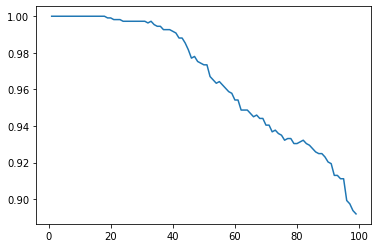

Acurácia máxima atingida em k=18 com valor de 1.0


In [86]:
print("Gerando gráfico de acurácia x K neighbors")
lix = []
liy = []
index=0
acc=0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(trainX, trainY)
    liy.append(neigh.score(testX, testY))
    if liy[k-1]>=acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("Acurácia máxima atingida em k="+str(index+1)+" com valor de "+str(acc))

In [127]:
print("Como encontrado acima, 18 é o maior valor sem perder acurácia")
model = KNeighborsClassifier(n_neighbors=18,	n_jobs=-1)
model.fit(trainX, trainY)
print(classification_report(testY, model.predict(testX), target_names=le.classes_))

Como encontrado acima, 18 é o maior valor sem perder acurácia
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00        93
 Apple Crimson Snow       1.00      1.00      1.00        79
     Apple Golden 1       1.00      1.00      1.00        89
     Apple Golden 2       1.00      1.00      1.00        86
     Apple Golden 3       1.00      1.00      1.00        91
 Apple Granny Smith       1.00      1.00      1.00        73
    Apple Pink Lady       1.00      1.00      1.00        90
        Apple Red 1       1.00      1.00      1.00        72
        Apple Red 2       1.00      1.00      1.00        90
        Apple Red 3       1.00      1.00      1.00        80
Apple Red Delicious       1.00      1.00      1.00        80
 Apple Red Yellow 1       1.00      1.00      1.00        81
 Apple Red Yellow 2       1.00      1.00      1.00        88

           accuracy                           1.00      1092
          macro avg  

In [133]:
print("Predizendo imagem teste")

labels = sorted(list(dict.fromkeys(labels)))

imagePath = "fruits-420/Test/Apple Braeburn/321_100.jpg"
data = []
image = cv2.imread(imagePath)
image = sp.preprocess(image)
data.append(image)
data = np.array(data)
data = data.reshape((data.shape[0], 3072))
print("[INFO] features matrix: {:.1f}MB".format(
	data.nbytes / (1024 * 1024.0)))

test_pred = model.predict(data)
print(labels[int(test_pred)])

Predizendo imagem teste
[INFO] features matrix: 0.0MB
Apple Braeburn
